In [19]:
import pandas as pd
import matplotlib.pyplot as plt
wnba = pd.read_csv('wnba.csv')
print(wnba.shape)
print(wnba.head())

(143, 32)
              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College ...  OREB  DREB  REB  AST  STL  BLK  \
0   January 17, 1994   23  Michigan State ...     6    22   28   12    3    6   
1       May 14, 1982   35            Duke ...    19    82  101   72   63   13   
2   October 27, 1990   26      Penn State ...     4    36   40   78   22    3   
3  December 11, 1988   28    Georgia Tech ...    35   134  169   65   20   10   
4     August 5, 1994   23          Baylor ...     3     9   12   12    7    0   

   TO  PTS  DD2  TD3  
0  12   93    0    0  
1  40  217    0    0  
2  24  

In [16]:
wnba['Pts_per_game'] = wnba['PTS'] / wnba['Games Played']
pos = ['F', 'G/F', 'C', 'G', 'F/C']
strata = {}
res = {}
for p in pos:
    strata[p] = wnba[wnba['Pos'] == p]
for k,v in strata.items():
    res[k] = v['Pts_per_game'].sample(10, random_state=0).mean()
print(res)
k = res.keys()
v = res.values()
position_most_points = max(res, key=res.get)
print('position_most_points;', position_most_points)

{'F': 8.7021751585455682, 'G/F': 6.8172649357604866, 'C': 9.8337613943342514, 'G': 7.0929261956323426, 'F/C': 9.059118773946361}
position_most_points; C


In [17]:
wnba['Games Played'].value_counts(bins = 3, normalize = True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

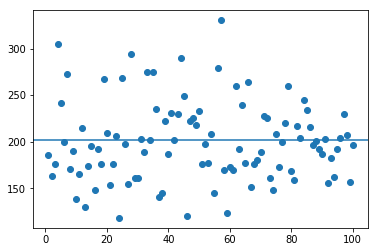

In [20]:
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

proportional_sampling_means = []

for i in range(100):
    sample_under_12 = under_12['PTS'].sample(1, random_state = i)
    sample_btw_13_22 = btw_13_22['PTS'].sample(2, random_state = i)
    sample_over_23 = over_23['PTS'].sample(7, random_state = i)
    
    final_sample = pd.concat([sample_under_12, sample_btw_13_22, sample_over_23])
    proportional_sampling_means.append(final_sample.mean())
    
plt.scatter(range(1,101), proportional_sampling_means)
plt.axhline(wnba['PTS'].mean())

In [21]:
clusters = pd.Series(wnba['Team'].unique()).sample(4, random_state = 0)

sample = pd.DataFrame()

for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)

sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()